# Compare temstapro predictions to acutal OGT labels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style('ticks')

In [3]:
preds = pd.read_csv('./predictions.tsv', sep='\t')

In [6]:
preds['clash'].value_counts()/len(preds)

-    0.955361
*    0.044639
Name: clash, dtype: float64

In [10]:
preds['pid'] = preds['protein_id'].apply(lambda x: x.split()[0])

In [24]:
preds = preds.set_index('pid', drop=True)

In [19]:
labels = pd.read_csv('temps.csv', index_col=0)
labels = labels.rename(columns={'0':'OGT'})

In [29]:
df = pd.merge(labels, preds, left_index=True, right_index=True)

In [39]:
df['thermophile'] = df['OGT'] >= 60

In [31]:
df = df[df['clash']=='-']

In [32]:
df

,OGT,protein_id,position,sequence,length,t40_binary,t40_raw,t45_binary,t45_raw,t50_binary,...,t55_binary,t55_raw,t60_binary,t60_raw,t65_binary,t65_raw,left_hand_label,right_hand_label,clash,thermophile
A0A495WNP3,28.0,A0A495WNP3 <unknown description,-,MAEQHSSKSIMWVTIIVAAVLIAIIFPLTNKSFQSAGSTTGADEAE...,147,0,2.193000e-08,0,3.464000e-05,0,...,0,7.835000e-16,0,2.605000e-07,0,5.588000e-10,<40,<40,-,False
Q9WZY9,75.0,Q9WZY9 <unknown description,-,MFSMRVPGNISVQTENGKVVKIILGSNETEGSEEILREIEEYLSGQ...,139,1,1.000000e+00,1,1.000000e+00,1,...,1,1.000000e+00,1,1.000000e+00,1,1.000000e+00,65<=,65<=,-,True
E4UAT9,60.0,E4UAT9 <unknown description,-,MQEELLALPATLTTSDGPEDYWLLVHPDADLAQAFAKARTLENCLR...,168,1,8.156000e-01,1,9.976000e-01,1,...,1,7.966000e-01,0,3.450000e-01,0,7.715000e-03,[55-60),[55-60),-,False
A0A7H0GDK9,30.0,A0A7H0GDK9 <unknown description,-,MADLVFYTNPQSRGQTVRWMLEEVGAPYDTEILDYASTMKAEPYLS...,210,0,9.890000e-09,0,1.230000e-09,0,...,0,1.852000e-16,0,9.646000e-10,0,1.324000e-12,<40,<40,-,False
A0A0D0WW88,28.0,A0A0D0WW88 <unknown description,-,MEDFPELMPLLTVAGGPMRGASFRLSRTPQVIGRATTVQVSVDDPH...,142,0,2.009000e-01,0,2.346000e-01,0,...,0,2.793000e-03,0,1.351000e-06,0,5.517000e-10,<40,<40,-,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1DT51,68.0,C1DT51 <unknown description,-,MWLHFGGKNIIIDPGPGSLIRMFERGLEPRDLNVVVLSHRHLDHVA...,228,1,1.000000e+00,1,1.000000e+00,1,...,1,1.000000e+00,1,1.000000e+00,1,1.000000e+00,65<=,65<=,-,True
C1DTD3,68.0,C1DTD3 <unknown description,-,MLNKNLMKLLNDLTPAVFATVDGDKPYLAFVSWLIAKDQNTLRVAL...,141,1,1.000000e+00,1,1.000000e+00,1,...,1,1.000000e+00,1,1.000000e+00,1,1.000000e+00,65<=,65<=,-,True
A0A3N2BGD2,30.0,A0A3N2BGD2 <unknown description,-,MSWFSRRKRRTAETDEATPAGPIIPDHPGPYDISELPDLGARADLG...,219,0,1.190000e-06,0,4.454000e-07,0,...,0,5.257000e-21,0,1.731000e-12,0,5.617000e-19,<40,<40,-,False
G7ZHY4,30.0,G7ZHY4 <unknown description,-,MSHRILIADDHPLMRTALTQTIGQAIPGAVILEASRFDQIKPVLDT...,216,0,5.332000e-03,0,9.733000e-06,0,...,0,1.932000e-10,0,1.330000e-07,0,1.397000e-09,<40,<40,-,False


In [66]:
df['right_hand_label'].value_counts()

<40        15225
65<=        8999
[60-65)     1481
[55-60)      497
[50-55)      412
[45-50)      340
[40-45)      269
Name: right_hand_label, dtype: int64

<Axes: xlabel='right_hand_label', ylabel='OGT'>

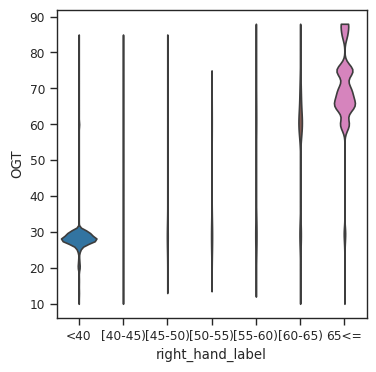

In [64]:
fig, ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=df, x='right_hand_label', y='OGT', order=['<40', '[40-45)', '[45-50)', '[50-55)', '[55-60)', '[60-65)', '65<='], ax=ax, scale='count', cut=0.0, inner=None)

In [72]:
counts = df.groupby(['right_hand_label', 'thermophile']).count()

In [75]:
counts = counts.reset_index()

Text(0.5, 0, 'TemStaPro label')

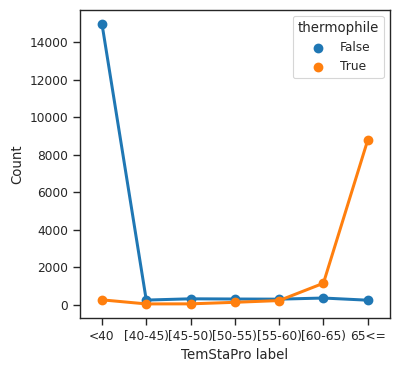

In [78]:
fig, ax = plt.subplots(figsize=(4,4))
sns.pointplot(data=counts, y='OGT', x='right_hand_label', order=['<40', '[40-45)', '[45-50)', '[50-55)', '[55-60)', '[60-65)', '65<='], hue='thermophile', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('TemStaPro label')

In [79]:
fig.savefig('tempstapro.png', dpi=400, bbox_inches='tight')

## Compute an f1 score

In [83]:
def do_one(row):
    if row['right_hand_label'] in ['[60-65)', '65<=']:
        return 1
    elif row['right_hand_label'] == '<40':
        return 0
    else:
        return 2

In [84]:
df['predicted_label'] = df.apply(do_one, axis=1)

In [86]:
df['predicted_label'].value_counts()

0    15225
1    10480
2     1518
Name: predicted_label, dtype: int64

In [87]:
accuracy = df['thermophile'] == df['predicted_label']

In [88]:
accuracy.mean()

0.9138963376556588

In [93]:
null_prediction = int(df['thermophile'].mean())

In [94]:
null_accuracy = (df['thermophile'] == null_prediction).mean()
null_accuracy

0.6125335194504646